In [1]:
import numpy as np
import pandas as pd

In [5]:
# Загрузка данных из CSV-файла 'train.csv' в DataFrame train_df
train_df = pd.read_csv('train.csv')

# Вывод содержимого DataFrame train_df для просмотра данных
train_df

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
101230327,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True
101230328,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True
101230329,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True
101230330,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True


In [8]:
# Загрузка данных из CSV-файла 'questions.csv' в DataFrame questions_df
questions_df = pd.read_csv('questions.csv')

# Вывод содержимого DataFrame questions_df для просмотра данных
questions_df

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


In [12]:
# Загрузка данных из CSV-файла 'lectures.csv' в DataFrame lectures_df
lectures_df = pd.read_csv('lectures.csv')

# Вывод содержимого DataFrame lectures_df для просмотра данных
lectures_df

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept


In [14]:
# Проверка на пропуски
train_df.isnull().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

In [18]:
# Проверка на пропуски
questions_df.isnull().sum()

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

In [20]:
# Проверка на пропуски
lectures_df.isnull().sum()

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

In [22]:
# Успеваемость по пользователям
user_performance = train_df.groupby('user_id')['answered_correctly'].mean().reset_index()
user_performance.columns = ['user_id', 'average_score']

# Объединение с данными о времени и объяснениях
time_explanation = train_df.groupby('user_id').agg({
    'prior_question_elapsed_time': 'mean',
    'prior_question_had_explanation': 'mean'
}).reset_index()

# Объединение всех данных в один DataFrame
performance_data = pd.merge(user_performance, time_explanation, on='user_id')
performance_data.head()

,user_id,average_score,prior_question_elapsed_time,prior_question_had_explanation
0,115,0.695652,19933.311111,0.133333
1,124,0.233333,18793.000000,0.0
2,2746,0.500000,18055.555556,0.578947
3,5382,0.632812,36048.387097,0.889764
4,8623,0.598214,26107.407407,0.864865


In [23]:
# Анализ вопросов
questions_summary = questions_df.groupby('part').agg({
    'question_id': 'count',
    'correct_answer': 'mean'
}).reset_index()
questions_summary.columns = ['part', 'question_count', 'average_correct_answer']
questions_summary

,part,question_count,average_correct_answer
0,1,992,1.502016
1,2,1647,1.310868
2,3,1562,1.499360
3,4,1439,1.477415
4,5,5511,1.454727
5,6,1212,1.444719
6,7,1160,1.547414


In [24]:
# Анализ лекций
lectures_summary = lectures_df.groupby('part').agg({
    'lecture_id': 'count'
}).reset_index()
lectures_summary.columns = ['part', 'lecture_count']
lectures_summary

,part,lecture_count
0,1,54
1,2,56
2,3,19
3,4,31
4,5,143
5,6,83
6,7,32


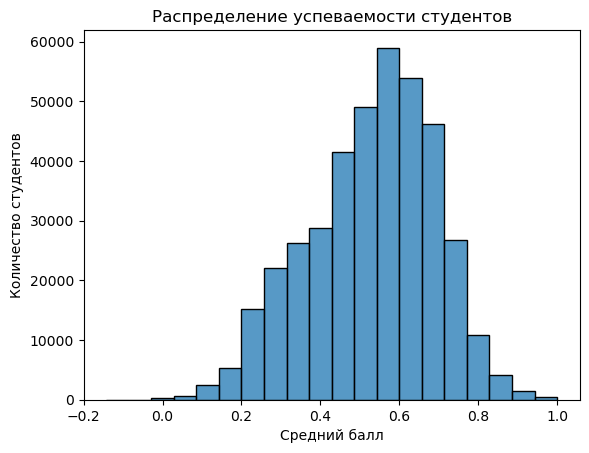

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация успеваемости студентов
sns.histplot(performance_data['average_score'], bins=20)
plt.title('Распределение успеваемости студентов')
plt.xlabel('Средний балл')
plt.ylabel('Количество студентов')
plt.show()